# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot as plt
from scipy import stats



# A. Solve using Analytical Calculus - Random data points

## Create random X and y samples

In [2]:
# Generate 'random' data
#np.random.seed(1)

# Number of Samples
n = 100

# Create r and r1, random vectors of 100 numbers each with mean = 0 and standard deviation = 1
r = np.random.randn(n)
r1 = np.random.randn(n)

# Create random Input vector X using r
# mean = 3
# stddev = 2
X = 3 * r + 2

# Create random Residual term Res using r
# mean = 0.8
# stddev = 0
res = 0.8 * r1 

# Generate Y values based on the simulated regression line and error/noise
# Population Regression Line
yreg = 2.5 + 0.35 * X 
# Adding noise/error
y = yreg + res                  

# Storing Population Regression Line "RegL", data points X and y in a data frame
rl = pd.DataFrame(
    {'X': X,
     'y': y,
     'RegL':yreg}
)

# Show the first five rows of our dataframe
rl.head()

,X,y,RegL
0,7.089975,5.879228,4.981491
1,0.665079,2.274799,2.732778
2,1.841888,1.681392,3.144661
3,2.488494,2.718577,3.370973
4,3.906150,4.622433,3.867153


In [31]:
x_test = rl['X'].values
x_test

array([ 7.08997503,  0.66507927,  1.84188808,  2.4884938 ,  3.90615043,
        3.37268401,  3.25046392,  0.44394661,  0.20289257,  2.31254935,
       -4.40659048,  0.13376398, -1.43654692,  4.40324508,  3.79237582,
       -0.24795457,  1.11539252, -1.62714564,  1.20277676,  7.88495349,
        1.21156351,  1.07060344,  2.98136316,  8.26527958,  5.02113359,
        7.02455834,  0.79898261, -1.54979793, -2.02674964, -0.29685292,
        3.68946925, -2.56033355,  0.58478513, -1.20146379,  3.12502912,
        4.31836739,  3.84883417,  0.68585399,  2.53317128,  2.5567204 ,
        3.55226918,  1.39839595,  3.21341524,  2.80972075,  6.19947044,
        4.9635085 ,  5.02104401, -0.43813813,  2.26493705,  2.63508223,
        3.14553045,  3.36349636,  0.28248702,  0.76015585,  6.53379877,
        6.38466504,  1.77885109,  0.76016743,  1.3945886 ,  6.77130273,
       -2.05142227,  3.9179255 ,  1.84179833,  3.40124209, -2.4909929 ,
        1.92288875,  0.14237398,  2.0154445 , -1.14470796,  4.00

## Calculate coefficients alpha and beta

In [3]:
# Assuming y = aX + b
# a ~ alpha
# b ~ beta

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of alpha
rl['CovXY'] = (rl['X'] - xmean) * (rl['y'] - ymean)
rl['VarX'] = (rl['X'] - xmean)**2

# Calculate alpha
# Numerator: Covariance between X and y
# Denominator: Variance of X
alpha = rl['CovXY'].sum() / rl['VarX'].sum()

# Calculate beta
beta = ymean - (alpha * xmean)
print('alpha =', alpha)
print('beta =',beta)

alpha = 0.4070117523955547
beta = 2.3003475720281745


In [27]:
X

array([ 7.08997503,  0.66507927,  1.84188808,  2.4884938 ,  3.90615043,
        3.37268401,  3.25046392,  0.44394661,  0.20289257,  2.31254935,
       -4.40659048,  0.13376398, -1.43654692,  4.40324508,  3.79237582,
       -0.24795457,  1.11539252, -1.62714564,  1.20277676,  7.88495349,
        1.21156351,  1.07060344,  2.98136316,  8.26527958,  5.02113359,
        7.02455834,  0.79898261, -1.54979793, -2.02674964, -0.29685292,
        3.68946925, -2.56033355,  0.58478513, -1.20146379,  3.12502912,
        4.31836739,  3.84883417,  0.68585399,  2.53317128,  2.5567204 ,
        3.55226918,  1.39839595,  3.21341524,  2.80972075,  6.19947044,
        4.9635085 ,  5.02104401, -0.43813813,  2.26493705,  2.63508223,
        3.14553045,  3.36349636,  0.28248702,  0.76015585,  6.53379877,
        6.38466504,  1.77885109,  0.76016743,  1.3945886 ,  6.77130273,
       -2.05142227,  3.9179255 ,  1.84179833,  3.40124209, -2.4909929 ,
        1.92288875,  0.14237398,  2.0154445 , -1.14470796,  4.00

## Prediction - Least Squares Line

In [4]:
ypred = alpha * X + beta

## Calculate Model Metrics - RSS, RSE(σ), TSS and R^2 Statistic

In [5]:
# Residual Errors
RE = (rl['y'] - ypred)**2
#Residual Sum Squares
RSS = RE.sum()
print("Residual Sum of Squares (RSS) is:",RSS)

# Estimated Standard Variation (sigma) or RSE
RSE = np.sqrt(RSS/(n-2))
print("\nResidual Standar Error (Standard Deviation σ) is:",RSE)

# Total Sum of squares (TSS)
TE = (rl['y'] - ymean)**2
# Total Sum Squares
TSS = TE.sum()
print("\nTotal Sum of Squares (TSS) is:",TSS)

# R^2 Statistic
R2 = 1 - RSS/TSS
print("\n R2 Statistic is:",R2)

Residual Sum of Squares (RSS) is: 61.56932954094504

Residual Standar Error (Standard Deviation σ) is: 0.7926275699870153

Total Sum of Squares (TSS) is: 196.60153210855484

 R2 Statistic is: 0.6868318935228382


## Assessing Coefficients accuracy

In [6]:
# Degrees of freedom
df = 2*n - 2

# Standard error, t-Statistic and  p-value for Slope "alpha" coefficient
SE_alpha = np.sqrt(RSE**2/rl['VarX'].sum())
t_alpha = alpha/SE_alpha
p_alpha = 1 - stats.t.cdf(t_alpha,df=df)

# Standard error, t-Statistic and  p-value for Intercept "beta" coefficient
SE_beta = np.sqrt(RSE*(1/n + xmean**2/(rl['VarX'].sum())))
t_beta = beta/SE_beta 
p_beta = 1 - stats.t.cdf(t_beta,df=df)

## Coefficients Assessment Summary

In [7]:
# Assessment of Coefficients
mds = pd.DataFrame(
    {'Name':['Slope (alpha)', 'Intercept (beta)'],
     'Coefficient': [alpha, beta],
     'RSE':[SE_alpha, SE_beta],
     't-Statistic':[t_alpha, t_beta],
     'p-Value':[p_alpha, p_beta]
    }
)
mds

,Name,Coefficient,RSE,t-Statistic,p-Value
0,Slope (alpha),0.407012,0.027762,14.660524,0.0
1,Intercept (beta),2.300348,0.109154,21.074359,0.0


## Model Assessment Summary

In [8]:
# Model Assessment - Storing all key indicators in dummy data frame with range 1
ms = pd.DataFrame(
    {'Ref': range(0,1),
     'Residual Sum of Squares (RSS)': RSS,
     'RSE (Standard Deviation σ)': RSE,
     'Total Sum of Squares (TSS)': TSS,
     'R2 Statistic': R2
     }
)

# Cut out the dummy index column to see the Results
ms.iloc[:,1:9]    

,Residual Sum of Squares (RSS),RSE (Standard Deviation σ),Total Sum of Squares (TSS),R2 Statistic
0,61.56933,0.792628,196.601532,0.686832


## Plot Predicted vs Actual vs Sampled Data

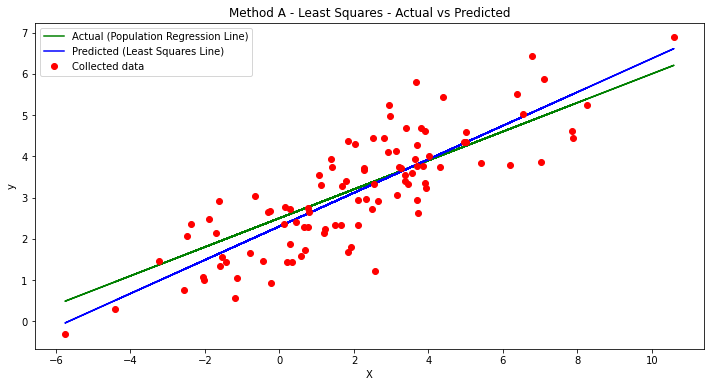

In [9]:

# Plot regression against actual data
plt.figure(figsize=(12, 6))
# Population Regression Line
plt.plot(X,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X, ypred, label = 'Predicted (Least Squares Line)', color='blue')     
# scatter plot showing actual data
plt.plot(X, y, 'ro', label ='Collected data')   
plt.title('Method A - Least Squares - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#plt.show()

# B. Solve using Matrix Algebra - Fixed data points

## Create and Format Data

In [10]:
# Reuse the same random inputs created above but reformated to Matrices
X1 = np.matrix([np.ones(n), rl['X']]).T
y1 = np.matrix(rl['y']).T

## Solve for projection matrix

In [11]:
A = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(y1)

m = A[1].item()
b = A[0].item()

print("b (bias/Y intercept) =",b,", and m (slope) =",m)

b (bias/Y intercept) = 2.300347572028174 , and m (slope) = 0.4070117523955547


In [12]:
A[1]

matrix([[0.40701175]])

In [13]:
m

0.4070117523955547

In [14]:
b

2.300347572028174

In [15]:
X1[1].T[1]

matrix([[0.66507927]])

In [16]:
X1_array = np.squeeze(np.asarray(X1[:].T[1]))

In [17]:
X1_array[1]

0.6650792712048645

In [18]:
X[1]

0.6650792712048645

In [19]:
ypred[0]

5.186050734022236

## Plot data and predictions

In [20]:
#xx = np.linspace(0, .5, 2)
y1pred = b + m * X1

In [21]:
y1pred[1].T[1]
y1pred_array = np.squeeze(np.asarray(y1pred[:].T[1]))

In [22]:
y1[0]

matrix([[5.87922772]])

In [23]:
y1_array = np.squeeze(np.asarray(y1[:]))
y1_array[1]

2.274798583895128

<Figure size 432x288 with 0 Axes>

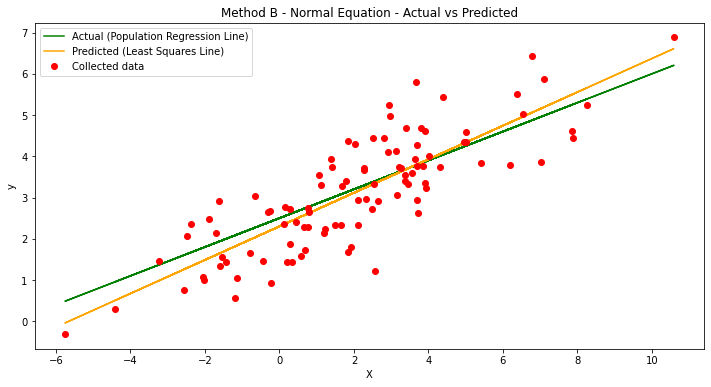

In [24]:
plt.figure(1)
# Plot regression against actual data
plt.figure(figsize=(12, 6));
# Population Regression Line
plt.plot(X1_array,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X1_array, y1pred_array, label = 'Predicted (Least Squares Line)', color='orange')     
# scatter plot showing actual data
plt.plot(X1_array, y1_array, 'ro', label ='Collected data')   
plt.title('Method B - Normal Equation - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#plt.show()


#plt.figure(1)
#plt.scatter(input[:,0], input[:,1], color='r')
#plt.plot(xx, yy.T, color='b')
#plt.show()